# Sentiment Analysis with Word Embedding

<p style=text:justify>In  this notebook I am going to design a simple sentiment analysis model using a deep structure that utilizes LSTM and word embedding. The goals of this notebook can be summarized as follows.</p>

- How to design a simple deep learning structure with LSTM cells and embedding layer.
- How to include an embedding layer as a part of the model structure.
- How to use pre-trained embeddings and build upon that.
- Inspecting some properties of embedding models.

# Sentiment Analysis

<p style='text-align:justify'>Sentiment Analysis is the process of extracting or inferring opinions from given texts. Sentiment Analysis sometimes called Opinion Mining is one of the most important fields within NLP, which has many practical applications. Thanks to Sentiment Analysis ,text , this unstructured information, can be transformed into structured opinion about products, services, brands, and any topics that people can express their feeling and opinion about. </p>

<p style='text-align:justify'>Sentiment Analysis more broadly is categorized under text classification. The number of categories in Sentiment Analysis can be varied depending on the application. For example, a movie sentiment can be categorized into positive, negative, or neutral. However, depending on the needs of the application, more fine-grained categories like very positive, positive, neutral, negative, and very negative can be used.</p>

# Inspecting data

<p style='text-align:justify'>The dataset chosen for for this notebook is the IMDB movie review dataset. Keras has provided a number of datasets and fortunately IMDB movie review dataset is one of them. The sentiments in this dataset are binary, namely positive and negative. This dataset contains 50,000 movie reviews where each review is represented as a sentence of words indexes. It provides a balanced train/test split, i.e. 25,000 reviews for train and 25,000 reviews for test. Another interesting feature is that words are sorted according to to their frequencies. For example, the index 2 corresponds to the second most frequent word in the data. And conventionally, 0 does not correspond to any specific word, instead it is used to represent any unknown words. </p>

Now, let's load the data and play with some of its features.

In [3]:
from keras.datasets import imdb

/home/peyman/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [4]:
vocabulary_size = 5000
(X_train,y_train), (X_test,y_test) = imdb.load_data(num_words=vocabulary_size,seed=113,skip_top=0)

<p style='text-align:justify'>In the above code ‘vocabulary_size’ is chosen to be 5000 and then is used to set the num_words argument. It means that we are only loading the first 5000 most frequent words. ‘seed’ argument is used for reproducibility purposes to fix the shuffling of the data. ‘skip_top’ is used to skip the top frequent words, which we are not going to skip any; however, it is just mentioned for the sake of getting familiar with it.</p>

Let's print the number of samples in train and test.

In [5]:
print('Number of training samples={}, Number of test samples={}'.format(len(X_train), len(X_test)))

Number of training samples=25000, Number of test samples=25000


To look at a specific review, we can use its index as follows.

In [6]:
print(X_train[6])

[1, 2, 365, 1234, 5, 1156, 354, 11, 14, 2, 2, 7, 1016, 2, 2, 356, 44, 4, 1349, 500, 746, 5, 200, 4, 4132, 11, 2, 2, 1117, 1831, 2, 5, 4831, 26, 6, 2, 4183, 17, 369, 37, 215, 1345, 143, 2, 5, 1838, 8, 1974, 15, 36, 119, 257, 85, 52, 486, 9, 6, 2, 2, 63, 271, 6, 196, 96, 949, 4121, 4, 2, 7, 4, 2212, 2436, 819, 63, 47, 77, 2, 180, 6, 227, 11, 94, 2494, 2, 13, 423, 4, 168, 7, 4, 22, 5, 89, 665, 71, 270, 56, 5, 13, 197, 12, 161, 2, 99, 76, 23, 2, 7, 419, 665, 40, 91, 85, 108, 7, 4, 2084, 5, 4773, 81, 55, 52, 1901]


In [7]:
print(y_train[6])

1


Label 1 is used for positive and labet 0 is used for negative reviews.

<p style='text-align:justify'>When working with text data it is very handy to know which words correspond to which index;also, it is useful to know which index correspond to which word. The IMDB dataset provided with keras has "get_word_index" function, which returns a dictionary contaring words as keys and indexes as values.s</p>

In [8]:
word2id = imdb.get_word_index()

In [9]:
print(word2id['the'])

1


As we can see "the" is the most frequent word since its index is 1.

Now, let's do the reverse and build a dictionary with indexes as keys and words as values.

In [10]:
id2word = {i: word for word, i in word2id.items()}

In [11]:
id2word[1]

'the'

Having "id2word" we can find the corresponding word for instance for the review number 6.

In [12]:
[id2word[x] for x in X_train[6]]

['the',
 'and',
 'full',
 'involving',
 'to',
 'impressive',
 'boring',
 'this',
 'as',
 'and',
 'and',
 'br',
 'villain',
 'and',
 'and',
 'need',
 'has',
 'of',
 'costumes',
 'b',
 'message',
 'to',
 'may',
 'of',
 'props',
 'this',
 'and',
 'and',
 'concept',
 'issue',
 'and',
 'to',
 "god's",
 'he',
 'is',
 'and',
 'unfolds',
 'movie',
 'women',
 'like',
 "isn't",
 'surely',
 "i'm",
 'and',
 'to',
 'toward',
 'in',
 "here's",
 'for',
 'from',
 'did',
 'having',
 'because',
 'very',
 'quality',
 'it',
 'is',
 'and',
 'and',
 'really',
 'book',
 'is',
 'both',
 'too',
 'worked',
 'carl',
 'of',
 'and',
 'br',
 'of',
 'reviewer',
 'closer',
 'figure',
 'really',
 'there',
 'will',
 'and',
 'things',
 'is',
 'far',
 'this',
 'make',
 'mistakes',
 'and',
 'was',
 "couldn't",
 'of',
 'few',
 'br',
 'of',
 'you',
 'to',
 "don't",
 'female',
 'than',
 'place',
 'she',
 'to',
 'was',
 'between',
 'that',
 'nothing',
 'and',
 'movies',
 'get',
 'are',
 'and',
 'br',
 'yes',
 'female',
 'just

Notice that since we are using only the first 5000 words the reviews does not represent the original full reviews. Instead each review contains only words among these 5000 words.

# Word Embedding

<p style='text-align:justify'>Before the invention of word embedding techniques, a common way to represent words to neural  networks was their one-hot encoded representation. For instance, in our data where we've chosen our vocab size to be 5000, each word would be a vector of size 5000 with all elements equal to zero except the index that correspond to a specific word.</p>

<p style='text-align:justify'>The are two main problems with one-hot representations. First, they are very high dimensional and sparse;hence, they are not computationally efficient. Second, the similarity or distance between these vectors are not meaningful. For example, if we consider cosine similarity as the similarity measure, the similarity between any two one-hot encoded vectors is zero. However, it will be desirable if we have semantically similar words to be more similar in terms of a similarity metric. For instance, we expect that similarity("man","woman") be greater than the similarity("man","laptop").</p>

<p style='text-align:justify'>To overcome these issues, word embedding techniques have come into play. Two main advantages of this methods are as follows. First, opposite to one-hot representation they provide a much lower dimension vectors, like 300. Second, in the embedded representation semantically similar words will be spatially closer to each other.</p>

<p style='text-align:justify'>One of the most well-known methods to obtain word embeddings is Word2Vec. Word2Vec is categorized to two methods: Continuous Bag of Word (CBOW) and Skip Gram. Both of these methods are neural networks in essence. The following figure illustrates their architectures.</p>

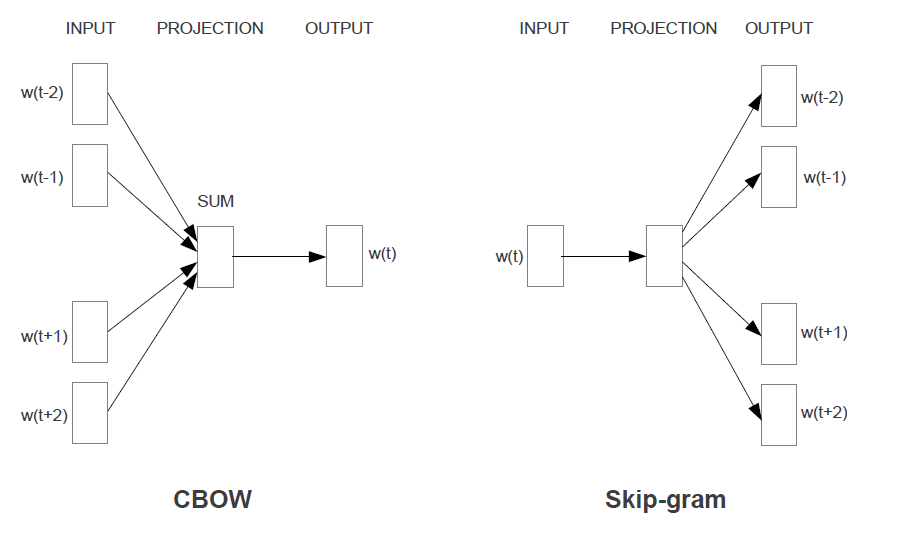

In [13]:
from IPython.display import Image
Image(filename='./Pics/Word2Vec1.png')

<p style='text-align:justify'>In the CBOW method the goal is to predict the center word (target word) based on its context. Usually, context is defined as a window of predefined length on both left and right side of the center word. Note that the input and output are all one-hot encoded. After training the model, the projection layer (embedding layer) is what we are interested in. In other words, the embedding of the center word will be the output of the projection layer. </p>

<p style='text-align:justify'>The Skip-gram model do the reverse of CBOW model. It predicts context words from the center or target word. After fitting the model, again the output of the projection layer will be the embedded representation of the center word.</p>

# Pre-trained Word2Vec model

<p style='text-align:justify'>Before using Word2Vec for our sentiment analysis task, first let's load a pre-trained Word2Vec model and see how these embeddings look like in practice. For this purpose, I am going to use Gensim library which is a well-known library for natural language processing. Google has trained a Word2Vec model on Google News Dataset. The model contains 3 million words and phrases and the embedding size is 300. Loading this model is Gensim is as simple as follows.</p>

In [14]:
import gensim

word_vectors = gensim.models.KeyedVectors.load_word2vec_format\
    ('./GoogleNews-vectors-negative300.bin.gz', binary=True)

Let's see how we can use this model by looking at some of its features and functions.

In [15]:
type(word_vectors)

gensim.models.keyedvectors.Word2VecKeyedVectors

In [16]:
word_vectors['book']

array([ 0.11279297, -0.02612305, -0.04492188,  0.06982422,  0.140625  ,
        0.03039551, -0.04370117,  0.24511719,  0.08740234, -0.05053711,
        0.23144531, -0.07470703,  0.21875   ,  0.03466797, -0.14550781,
        0.05761719,  0.00671387, -0.00701904,  0.13183594, -0.25390625,
        0.14355469, -0.140625  , -0.03564453, -0.21289062, -0.24804688,
        0.04980469, -0.09082031,  0.14453125,  0.05712891, -0.10400391,
       -0.19628906, -0.20507812, -0.27539062,  0.03063965,  0.20117188,
        0.17382812,  0.09130859, -0.10107422,  0.22851562, -0.04077148,
        0.02709961, -0.00106049,  0.02709961,  0.34179688, -0.13183594,
       -0.078125  ,  0.02197266, -0.18847656, -0.17480469, -0.05566406,
       -0.20898438,  0.04858398, -0.07617188, -0.15625   , -0.05419922,
        0.01672363, -0.02722168, -0.11132812, -0.03588867, -0.18359375,
        0.28710938,  0.01757812,  0.02185059, -0.05664062, -0.01251221,
        0.01708984, -0.21777344, -0.06787109,  0.04711914, -0.00

The above line of code shows that we can pass each word and get the embedding of that word. Let's find out the dimension of the embedding vector.

In [17]:
word_vectors['book'].shape

(300,)

So, as mentioned earlier the embedding dimension in this model is 300.

We can use this model to find similar words to a given word in terms of cosine similarity.

In [18]:
word_vectors.similar_by_vector('book')

[('tome', 0.7485830783843994),
 ('books', 0.7379178404808044),
 ('memoir', 0.7302927374839783),
 ('paperback_edition', 0.6868364810943604),
 ('autobiography', 0.6741527915000916),
 ('memoirs', 0.6505153179168701),
 ('Book', 0.6479282379150391),
 ('paperback', 0.6471226811408997),
 ('novels', 0.6341458559036255),
 ('hardback', 0.6283079385757446)]

In [19]:
word_vectors.similar_by_vector('man')

[('woman', 0.7664012908935547),
 ('boy', 0.6824870109558105),
 ('teenager', 0.6586930155754089),
 ('teenage_girl', 0.6147903800010681),
 ('girl', 0.5921714305877686),
 ('suspected_purse_snatcher', 0.5716364979743958),
 ('robber', 0.5585119128227234),
 ('Robbery_suspect', 0.5584409236907959),
 ('teen_ager', 0.5549196600914001),
 ('men', 0.5489763021469116)]

It is actually interesting. We can see that the words similar to the given words are actually semantically similar.

We can find the cosine similarity between two words as follows.

In [20]:
word_vectors.similarity('man','woman')

0.76640123

In [21]:
word_vectors.similarity('man','book')

0.05060061

Expected! We actually expected that "man" is more similar to "woman" than to "book".

<p style='text-align:justify'>We can perform arithmetic operations on these vector and see some interesting results. For example, one very famous example is that if we add vectors of "woman" and "king" then subtract "man" from it, what would you expect to get?</p>

In [22]:
word_vectors.wv.most_similar(positive=['woman','king'],negative=['man'])

/home/peyman/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  """Entry point for launching an IPython kernel.


[('queen', 0.7118192911148071),
 ('monarch', 0.6189674139022827),
 ('princess', 0.5902431011199951),
 ('crown_prince', 0.5499460697174072),
 ('prince', 0.5377321243286133),
 ('kings', 0.5236844420433044),
 ('Queen_Consort', 0.5235945582389832),
 ('queens', 0.518113374710083),
 ('sultan', 0.5098593235015869),
 ('monarchy', 0.5087411999702454)]

Interesting! The most similar is "queen"! Very intuitive!

# Visualizing word embeddings using t-SNE

t-Distributed Stochastic Neighbor Embedding (t-SNE) is a dimensionality reduction technique that is especially well-suited for visualization purposes of high-dimensional dataset. In the following code I am going use this technique to map word embeddings on a two dimensional space and visualize them.

In [37]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np

def tsne_word_embedding(model, word):
    words_array = np.empty((0, 300), dtype='f')
    word_labels = [word]

    # get most similar words
    similar_words = model.similar_by_word(word)

    # add vectors of similar words to words_array
    words_array = np.append(words_array, np.array([model[word]]), axis=0)
    for wrd_score in similar_words:
        wrd_vector = model[wrd_score[0]]
        word_labels.append(wrd_score[0])
        words_array = np.append(words_array, np.array([wrd_vector]), axis=0)

    # find tsne coords for 2 dimensions
    tsne = TSNE(n_components=2, random_state=0)
    np.set_printoptions(suppress=True)
    Y = tsne.fit_transform(words_array)

    x_coords = Y[:, 0]
    y_coords = Y[:, 1]
    # display scatter plot
    plt.scatter(x_coords, y_coords)

    for label, x, y in zip(word_labels, x_coords, y_coords):
        plt.annotate(label, xy=(x, y), xytext=(0, 0), textcoords='offset points')
    plt.xlim(x_coords.min() - 5, x_coords.max() + 5)
    plt.ylim(y_coords.min() - 5, y_coords.max() + 5)
    plt.show()


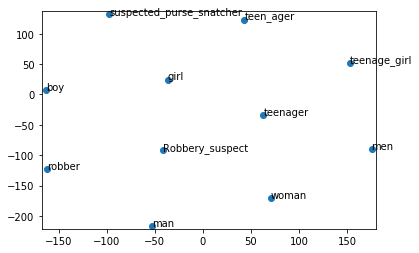

In [38]:
tsne_word_embedding(word_vectors, 'man')

# A simple LSTM deep network with embedding as part of the architecture

<p style='text-align:justify'>In this section we are going to  forget about the pre-trained word2vec model and make our own word2vec model. One way of doing this in Keras is to make embedding part of the model architecture. </p>

<p style='text-align:justify'>Keras has a built-in embedding layer that can be used for text data. It expects integer encoded data as its input. It can be used in two main ways: 1- as a stand alone model to learn word embedding that can be used later. 2- as part of the entire model architecture. Here we are intended to use it as part of the entire model.</p>

<p style='text-align:justify'>Also, it is worth to mention that the embedding layer is defined as the first layer of the network. It is defined as the first layer so that the rest of the model can be built on top of the learned embeddings. The main three arguments that must be defined for an Keras embedding layers are as follows:
</p>

- input_dim: It is the equivalent of vocabulary size. For example, in our case where we have 5000 words it will be set to 5000.

- output_dum: It is the embedding size. For example, if we set it to be 300, it means that each word will be represented by a 300 dimension vector.

- input_length: To be able to feed the data to the embedding layer all input sequences must have the same length. input_length determines that length.

Let's first import some required Keras libraries.

In [24]:
from keras.preprocessing import sequence
from keras import Sequential
from keras.layers import Embedding, LSTM, Dense, Dropout

<p style='text-align:justify'>As mentioned above, since all sentences are needed to be the same length we need to pad all sentences to the length of longest sentence so that all sentences have the same length.</p>

In [25]:
max_words = 500
X_train = sequence.pad_sequences(X_train,maxlen=max_words)
X_test = sequence.pad_sequences(X_test,maxlen=max_words)

Let's start defining a simple lstm model including embedding layer. 

In [26]:
embedding_size=300
model=Sequential()
model.add(Embedding(input_dim=vocabulary_size, output_dim=embedding_size, input_length=max_words))
model.add(LSTM(units=100))
model.add(Dense(1, activation='sigmoid'))

<p style='text-align:justify'>In the above code an LSTM layer with 100 units is used. Also, because it is a classification task the last layer is a Dense layer with one unit and sigmoid activation function.</p>

<p style='text-align:justify'>The next step is to compile the model. A typical loss function for binary classification task is "binary_crossentropy", and "adam" is going to be used as the optimization algorithm. Also, to get an intuitive sense of model's performance "accuracy" metric is used.</p>

In [27]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

The batch size and number of epochs for training are defined as follows.

In [28]:
batch_size = 64
num_epochs = 3

Now, we can actually start traing the model.

In [29]:
model.fit(X_train, y_train, batch_size=batch_size, epochs=num_epochs)

Epoch 1/3
25000/25000 [==============================] - 803s 32ms/step - loss: 0.4507 - acc: 0.7872
Epoch 2/3
25000/25000 [==============================] - 799s 32ms/step - loss: 0.3009 - acc: 0.8777
Epoch 3/3
25000/25000 [==============================] - 875s 35ms/step - loss: 0.3015 - acc: 0.8761


As the final step, let's see the performance of the model on our test set.

In [30]:
scores = model.evaluate(X_test, y_test, verbose=0)
print('Test accuracy:', scores[1])

Test accuracy: 0.85168


# A LSTM model on top of pre-trained embedding

<p style='text-align:justify'>In this section I am going to turn to use an LSTM model on top of the pretrained google embedding. Not only we are going to use this pretrained embedding, but also we are going to use it to do transfer learning. I can be considered as transfer learning because we will be using the pre-trained weight as our initial weight for the Keras embedding and kind of tailor it to our sentiment analysis application by further training of the model.</p>

<p style='text-align:justify'>This code will be very similar to the previous section. The only difference is that we need to first load the pre-trained Google embedding weights and set these weights as our initial weights of our Keras embedding layer.
</p>

In [31]:
import gensim

word_vectors = gensim.models.KeyedVectors.load_word2vec_format\
    ('./GoogleNews-vectors-negative300.bin.gz', binary=True)

<p style='text-align:justify'>However, before setting these weights as the initial weights for the Keras embedding layer, we need to select only those words that exist in our dataset. We are going to do this by iterating through words in ‘word2id’ dictionary that were built earlier and select their Google embedding representation.</p>

In [32]:
import numpy as np

embedding_matrix = np.zeros((vocabulary_size, embedding_size))
for word,i in word2id.items():
    if i >= vocabulary_size:
        continue
    try:
        embedding_vector = word_vectors[word]
        embedding_matrix[i] = embedding_vector
    except:
        embedding_matrix[i] = np.random.normal(0, np.sqrt(0.25), embedding_size)


In [33]:
model=Sequential()
model.add(Embedding(vocabulary_size, embedding_size, input_length=max_words, \
                    weights=[embedding_matrix]))
model.add(LSTM(100))
model.add(Dense(1, activation='sigmoid'))


Note that the only difference between this model and the previous model is the use of weights argument in the Keras embedding layer.

In [34]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [35]:
model.fit(X_train, y_train, batch_size=batch_size, epochs=num_epochs)

Epoch 1/3
25000/25000 [==============================] - 843s 34ms/step - loss: 0.5388 - acc: 0.7233
Epoch 2/3
25000/25000 [==============================] - 806s 32ms/step - loss: 0.3740 - acc: 0.8391
Epoch 3/3
25000/25000 [==============================] - 834s 33ms/step - loss: 0.2700 - acc: 0.8914


In [36]:
scores = model.evaluate(X_test, y_test, verbose=0)
print('Test accuracy:', scores[1])

Test accuracy: 0.86892


# Summary

<p style='text-align:justify'>In this notebook we went through mainly three different things. One was what is word embedding and how to work with it and visualize embeddings of words in low dimension using dimensionality reduction techniques like t-SNE. The other one was how to create a LSTM recurrent neural network with an included Keras embedding layer for the sentiment analysis task. The last one was how to load a pre-trained embedding weights and built the model on top of that.</p>